In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
def boostrap(statistic_func, iterations, data):
	samples  = np.random.choice(data,replace = True, size = [iterations, len(data)])
	#print samples.shape
	data_mean = data.mean()
	vals = []
	for sample in samples:
		sta = statistic_func(sample)
		#print sta
		vals.append(sta)
	b = np.array(vals)
	#print b
	lower, upper = np.percentile(b, [2.5, 97.5])
	return data_mean,lower, upper

In [3]:
df = pd.read_csv('./vehicles.csv')
#print df.columns

In [4]:
df

Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
5               15       35.0
6               14       24.0
7               14       19.0
8               14       28.0
9               15       23.0
10              15       27.0
11              14       20.0
12              15       22.0
13              14       18.0
14              22       20.0
15              18       31.0
16              21       32.0
17              21       31.0
18              10       32.0
19              10       24.0
20              11       26.0
21               9       29.0
22              28       24.0
23              25       24.0
24              19       33.0
25              16       33.0
26              17       32.0
27              19       28.0
28              18       19.0
29              14       32.0
..             ...        ...
219             24        NaN
220             30        NaN
221             39        NaN
222             35        NaN
223             34        NaN
224             30        NaN
225             22        NaN
226             27        NaN
227             20        NaN
228             18        NaN
229             28        NaN
230             27        NaN
231             34        NaN
232             31        NaN
233             29        NaN
234             27        NaN
235             24        NaN
236             23        NaN
237             38        NaN
238             36        NaN
239             25        NaN
240             38        NaN
241             26        NaN
242             22        NaN
243             36        NaN
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]

(0, 45.0)

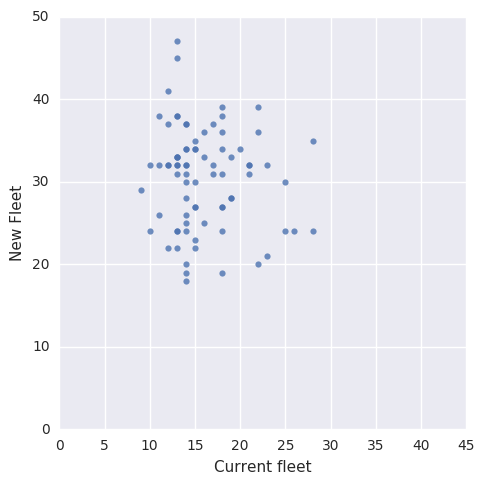

In [5]:
sns_plot = sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False)
sns_plot.axes[0,0].set_ylim(0,)
sns_plot.axes[0,0].set_xlim(0,)


In [6]:
data = df.values.T[0]

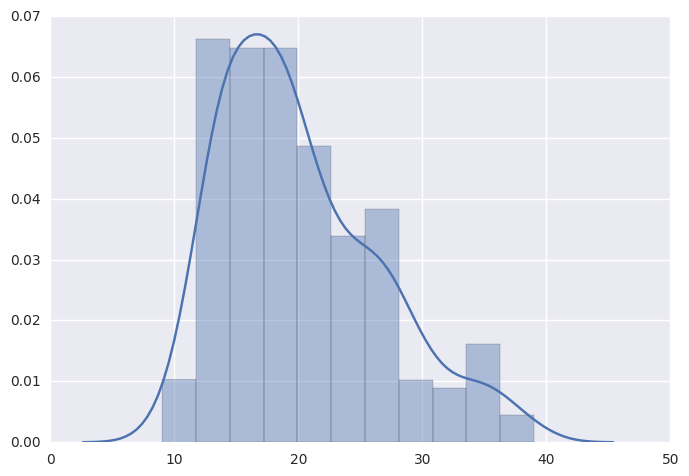

In [7]:
sns.distplot(data);

In [8]:
data2 = df.values.T[1][:79]

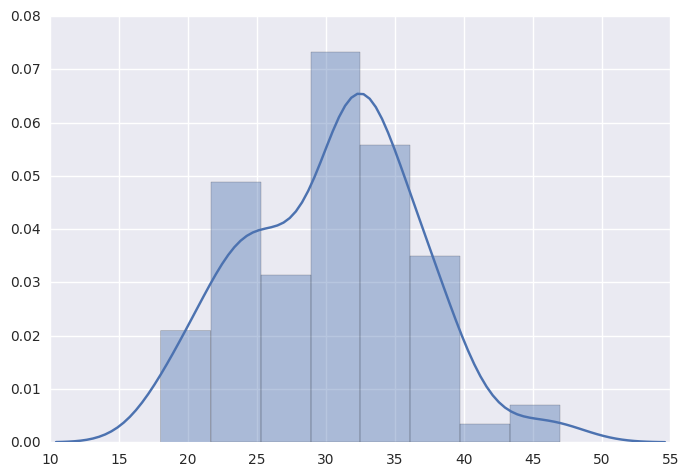

In [9]:
sns.distplot(data2);

In [10]:
boots = []
#for i in range(100,100000,1000):
for i in range(100,100000,1000):
	boot = boostrap(np.mean, i, data)
	boots.append([i,boot[0], "mean"])
	boots.append([i,boot[1], "lower"])
	boots.append([i,boot[2], "upper"])

(0, 10000)

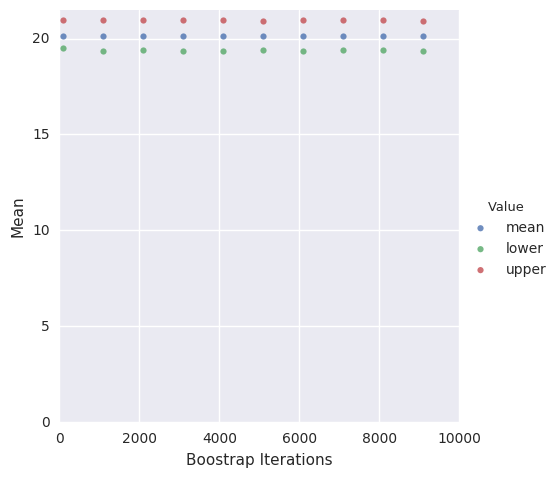

In [11]:
df_boot = pd.DataFrame(boots,  columns=['Boostrap Iterations','Mean',"Value"])
sns_plot = sns.lmplot(df_boot.columns[0],df_boot.columns[1], data=df_boot, fit_reg=False,  hue="Value")
sns_plot.axes[0,0].set_ylim(0,)
sns_plot.axes[0,0].set_xlim(0,10000)

(0, 100000)

In [ ]:
sns_plot.savefig("bootstrap_confidence1.pdf",bbox_inches='tight')